# Introduction

Weilun Tang 

Written by 11/13/2021

This code is to find the global minimum for large N with different minimization method. The minimization methods in this code are CG, BFGS, and Powell.

# Imports

In [61]:
import numpy as np
from scipy.optimize import minimize
import time
from numba import jit, njit, vectorize
import matplotlib.pyplot as plt

# Fucntions 

In [35]:
@jit
def LJ(r):
    return 4*(1/r**12 - 1/r**6)

@jit
def total_energy(positions):
    E = 0
    N_atom = int(len(positions)/3)
    #positions = [x0, y0, z0, x1, y1, z1, .....  , xn, yn, zn]
    for i in range(N_atom-1):
        for j in range(i+1, N_atom):
            #pos1 and pos2 are vector 1 and vector 2
            #multiply the factor 3 so vector 1 and 2 do not have the same 
            #elements for their parameters
            pos1 = positions[i*3:(i+1)*3]
            pos2 = positions[j*3:(j+1)*3]
            #pos1 - pos2 is the separation  vector 
            #dist is the magnitude of the separation vector 
            dist = np.linalg.norm(pos1-pos2)
            E += LJ(dist)
    return E

@jit
def init_pos(N, L=5):
    return L*np.random.random_sample((N*3,))

# Main Loop

## CG, N = 15

step:  0   values: -35.39404714756113
step:  10   values: -47.51511910989835
The global minimum:   -52.32262726173809
Took 42.78007411956787 seconds


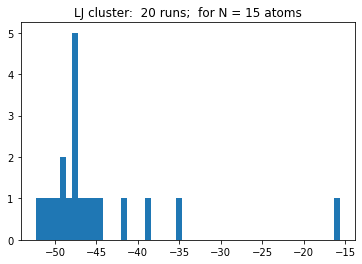

In [64]:
%matplotlib inline
t0 = time.time()
f_values = []
x_values = []
N_attempts = 20
N_atom = 15

for i in range(N_attempts):
    pos = init_pos(N_atom)
    res = minimize(total_energy, pos, method='CG', tol=1e-4)
    f_values.append(res.fun)
    x_values.append(res.x)
    if i%10==0:
        print('step: ', i, '  values:', res.fun)

t1 = time.time() 
print('The global minimum:  ', min(f_values))
print(f"Took {t1-t0} seconds")  
plt.title('LJ cluster:  '+ str(N_attempts)+ ' runs;  for N = ' + str(N_atom)+' atoms')
plt.hist(f_values,50)
plt.show()

CG is very slow when N > 15. 

## BFGS, N = 15

step:  0   values: -47.44928902620034
step:  10   values: -37.616589563790484
The global minimum:   -51.41803722527169
Took 22.058849096298218 seconds


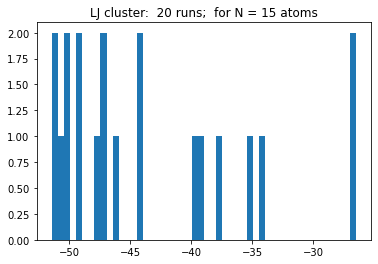

In [65]:
t0 = time.time()
f_values = []
x_values = []
N_attempts = 20
N_atom = 15

for i in range(N_attempts):
    pos = init_pos(N_atom)
    res = minimize(total_energy, pos, method='BFGS', tol=1e-4)
    f_values.append(res.fun)
    x_values.append(res.x)
    if i%10==0:
        print('step: ', i, '  values:', res.fun)

t1 = time.time() 
print('The global minimum:  ', min(f_values))
print(f"Took {t1-t0} seconds")
plt.title('LJ cluster:  '+ str(N_attempts)+ ' runs;  for N = ' + str(N_atom)+' atoms')
plt.hist(f_values,50)
plt.show()

## BFGS, N = 17

step:  0   values: -53.82463338037561
step:  10   values: -37.60020986330436
The global minimum:   -61.31799465989012
Took 36.04764008522034 seconds


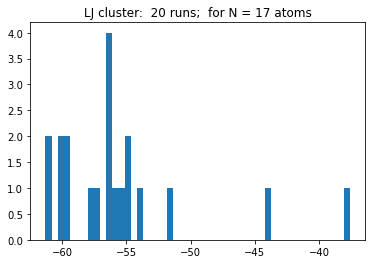

In [66]:
t0 = time.time()
f_values = []
x_values = []
N_attempts = 20
N_atom = 17

for i in range(N_attempts):
    pos = init_pos(N_atom)
    res = minimize(total_energy, pos, method='BFGS', tol=1e-4)
    f_values.append(res.fun)
    x_values.append(res.x)
    if i%10==0:
        print('step: ', i, '  values:', res.fun)

t1 = time.time() 
print('The global minimum:  ', min(f_values))
print(f"Took {t1-t0} seconds")
plt.title('LJ cluster:  '+ str(N_attempts)+ ' runs;  for N = ' + str(N_atom)+' atoms')
plt.hist(f_values,50)
plt.show()

## BFGS, N = 20

step:  0   values: -52.67526753980305
step:  10   values: -59.27150728795375
The global minimum:   -76.21014540555507
Took 77.11557292938232 seconds


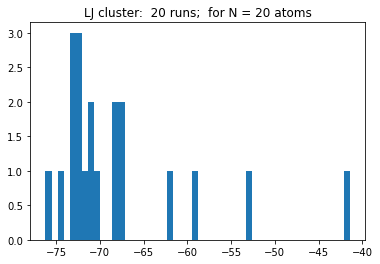

In [68]:
t0 = time.time()
f_values = []
x_values = []
N_attempts = 20
N_atom = 20

for i in range(N_attempts):
    pos = init_pos(N_atom)
    res = minimize(total_energy, pos, method='BFGS', tol=1e-4)
    f_values.append(res.fun)
    x_values.append(res.x)
    if i%10==0:
        print('step: ', i, '  values:', res.fun)

t1 = time.time() 
print('The global minimum:  ', min(f_values))
print(f"Took {t1-t0} seconds")
plt.title('LJ cluster:  '+ str(N_attempts)+ ' runs;  for N = ' + str(N_atom)+' atoms')
plt.hist(f_values,50)
plt.show()

BFGS method is the best among these three methods. It is the fastest method and output an accurate global minimum. It can also run large N.

## Powell, N = 15

step:  0   values: -47.10349991774453
step:  10   values: -48.546897251865815
The global minimum:   -50.61844612781014
Took 54.592886209487915 seconds


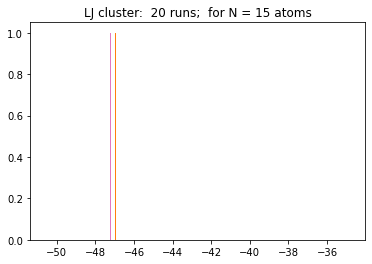

In [69]:
t0 = time.time()
f_values = []
x_values = []
N_attempts = 20
N_atom = 15

for i in range(N_attempts):
    pos = init_pos(N_atom)
    res = minimize(total_energy, pos, method='Powell', tol=1e-4)
    f_values.append(res.fun)
    x_values.append(res.x)
    if i%10==0:
        print('step: ', i, '  values:', res.fun)

t1 = time.time() 
print('The global minimum:  ', min(f_values))
print(f"Took {t1-t0} seconds")  
plt.title('LJ cluster:  '+ str(N_attempts)+ ' runs;  for N = ' + str(N_atom)+' atoms')
plt.hist(f_values,50)
plt.show()

## Powell, N = 17

step:  0   values: -58.118555383095455
step:  10   values: -42.54776796730888
The global minimum:   -58.118555383095455
Took 81.74511003494263 seconds


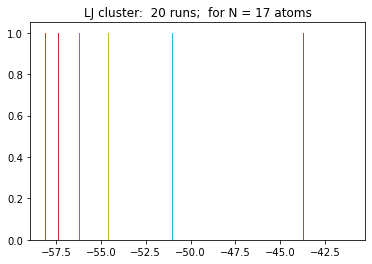

In [70]:
t0 = time.time()
f_values = []
x_values = []
N_attempts = 20
N_atom = 17

for i in range(N_attempts):
    pos = init_pos(N_atom)
    res = minimize(total_energy, pos, method='Powell', tol=1e-4)
    f_values.append(res.fun)
    x_values.append(res.x)
    if i%10==0:
        print('step: ', i, '  values:', res.fun)

t1 = time.time() 
print('The global minimum:  ', min(f_values))
print(f"Took {t1-t0} seconds")  
plt.title('LJ cluster:  '+ str(N_attempts)+ ' runs;  for N = ' + str(N_atom)+' atoms')
plt.hist(f_values,50)
plt.show()

Powell can run at N > 15, but the output global minimum is not accurate. Both cases are a little bit off compared to other methods. 